In [1]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [4]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3383296/45929032 bytes (7.4%)7593984/45929032 bytes (16.5%)11640832/45929032 bytes (25.3%)15581184/45929032 bytes (33.9%)19619840/45929032 bytes (42.7%)23494656/45929032 bytes (51.2%)27672576/45929032 bytes (60.3%)31719424/45929032 bytes (69.1%)35807232/45929032 bytes (78.0%)39927808/45929032 bytes (86.9%)43999232/45929032 bytes (95.8%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [6]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 400,400
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [7]:
# Let's render something!
# find zone
# convert to zone 0
# apply mid point algo
# convert back to original zone

def findZone(x1,y1,x2,y2):
  dx=x2-x1
  dy=y2-y1
  if abs(dx)>abs(dy):
    if dx>=0 and dy>=0:
      return 0
    if dx<0 and dy>=0:
      return 3
    if dx<0 and dy<0:
      return 4
    if dx>=0 and dy<0:
      return 7 
  else:
    if dx>=0 and dy>=0:
      return 1
    if dx<0 and dy>=0:
      return 2
    if dx<0 and dy<0:
      return 5
    if dx>=0 and dy<0:
      return 6

# print(findZone(0,20,10,20))

def convertToZone0(z,x1,y1,x2,y2):
  if z==0:
    return [x1,y1,x2,y2]
  if z==1:
    return [y1,x1,y2,x2]
  if z==2:
    return [y1,-x1,y2,-x2]
  if z==3:
    return [-x1,y1,-x2,y2]
  if z==4:
    return [-x1,-y1,-x2,-y2]
  if z==5:
    return [-y1,-x1,-y2,-x2]
  if z==6:
    return [-y1,-x1,-y2,-x2]
  if z==7:
    return [x1,-y1,x2,-y2]

def convertToOriginal(z,x,y):
  if z==0:
    return [x,y]
  if z==1:
    return [y,x]
  if z==2:
    return [-y,x]
  if z==3:
    return [-x,y]
  if z==4:
    return [-x,-y]
  if z==5:
    return [-y,-x]
  if z==6:
    return [y,-x]
  if z==7:
    return [x,-y]


gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(0,1,0)
gl.glPointSize(5)
def DrawLine(x1,y1,x2,y2):
  z=findZone(x1,y1,x2,y2)
  # print(z)

  converted_coordinates=convertToZone0(z,x1,x2,y1,y2)
  # print(converted_coordinates)
  x1=converted_coordinates[0]
  y1=converted_coordinates[1]
  x2=converted_coordinates[2]
  y2=converted_coordinates[3]

  dx=x2-x1
  dy=y2-y1
  D=2*dy-dx
  dNE=2*(dy-dx)
  dE=2*dy
  x=x1
  y=y1

  while(x<=x2):
    #Draw(x,y)
    # print(x,y) # this is zone 0 coordinates

    pixel=convertToOriginal(z,x,y)
    p1=pixel[0]
    q1=pixel[1]
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(p1/100,q1/100)
    gl.glEnd()

    x+= 1
    if (D>0):
      y+= 1  # 0.001
      D+=dNE
    else:
      D+=dE



#id 20101327
# for 2
DrawLine(-30,-10,50,50)  #x1,x2,y1,y2
DrawLine(-30,-10,30,30)
DrawLine(-30,-10,10,10)
DrawLine(-10,-10,30,50)
DrawLine(-30,-30,10,30)


#for 7

DrawLine(20,20,10,50)
DrawLine(-2,20,50,50)






    








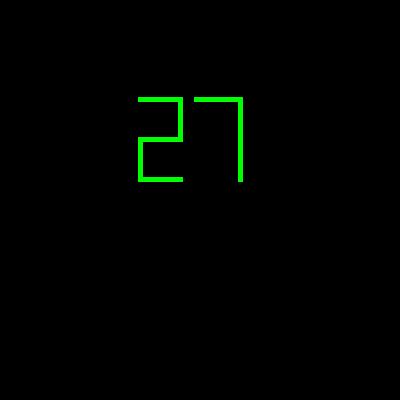

In [8]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)